<a href="https://colab.research.google.com/github/dksingh24/Exploratory_Analysis/blob/main/Suicide_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## India Suicides - Data Analysis
Done By - Sakhil,Sachin,Dushyant,Anurag,Ankit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


For Cleaning let's first remove the rows where Total = 0(i.e. with 0 suicides)



In [ ]:
df = df[df['Total'] != 0]

Also let's remove age group 0-100+

In [ ]:
df = df[df['Age_group'] != '0-100+']

In [ ]:
print ( " Indian states where the data is collected from ", df['State'].unique())

 Indian states where the data is collected from  ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


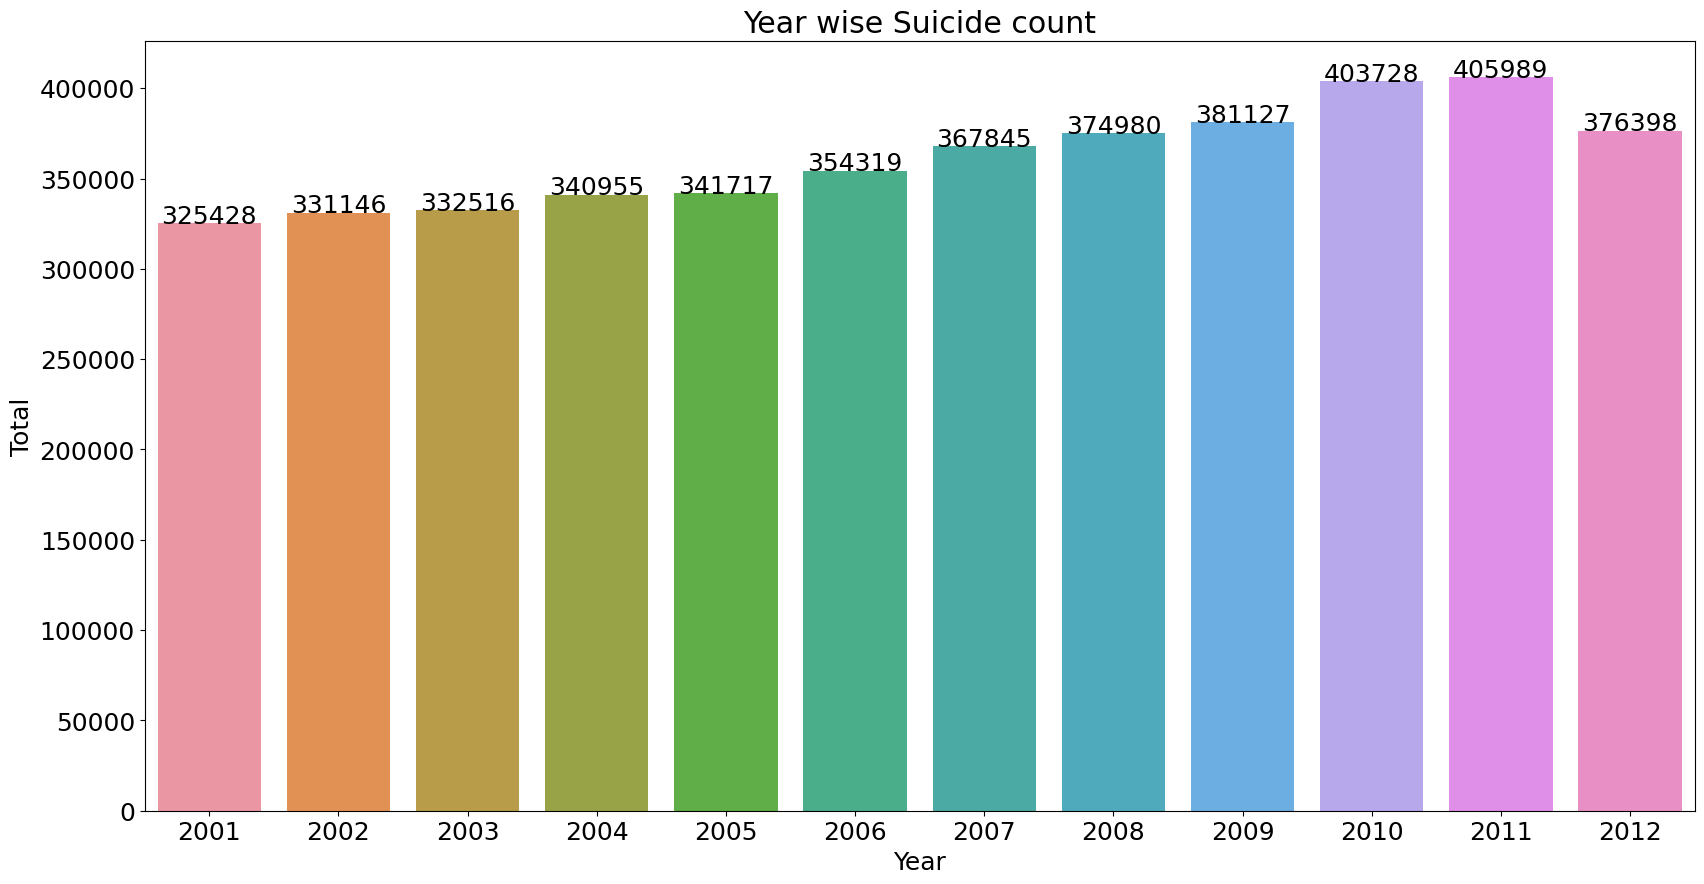

In [ ]:
yearwise= df[['Year', 'Total']].groupby('Year').sum()
yearwise.reset_index(inplace = True)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
trace = sns.barplot(x = yearwise['Year'], y = yearwise['Total'], data = yearwise)
for index, row in yearwise.iterrows():
    trace.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Year wise Suicide count')
plt.show()

In [ ]:
round((yearwise['Total'].max() - yearwise['Total'].min())/yearwise['Total'].min()*100, 2)

24.76

<p> <span style="color:blue">Year 2011 recorded highest suicides ( 405989)  <em> </span>.</p>
<p> <span style="color:blue">From Year 2001 to 2011 sucides rate is increased by 24.76% <em> </span>.</p>

 **Yearly Males , Females suicide rates**

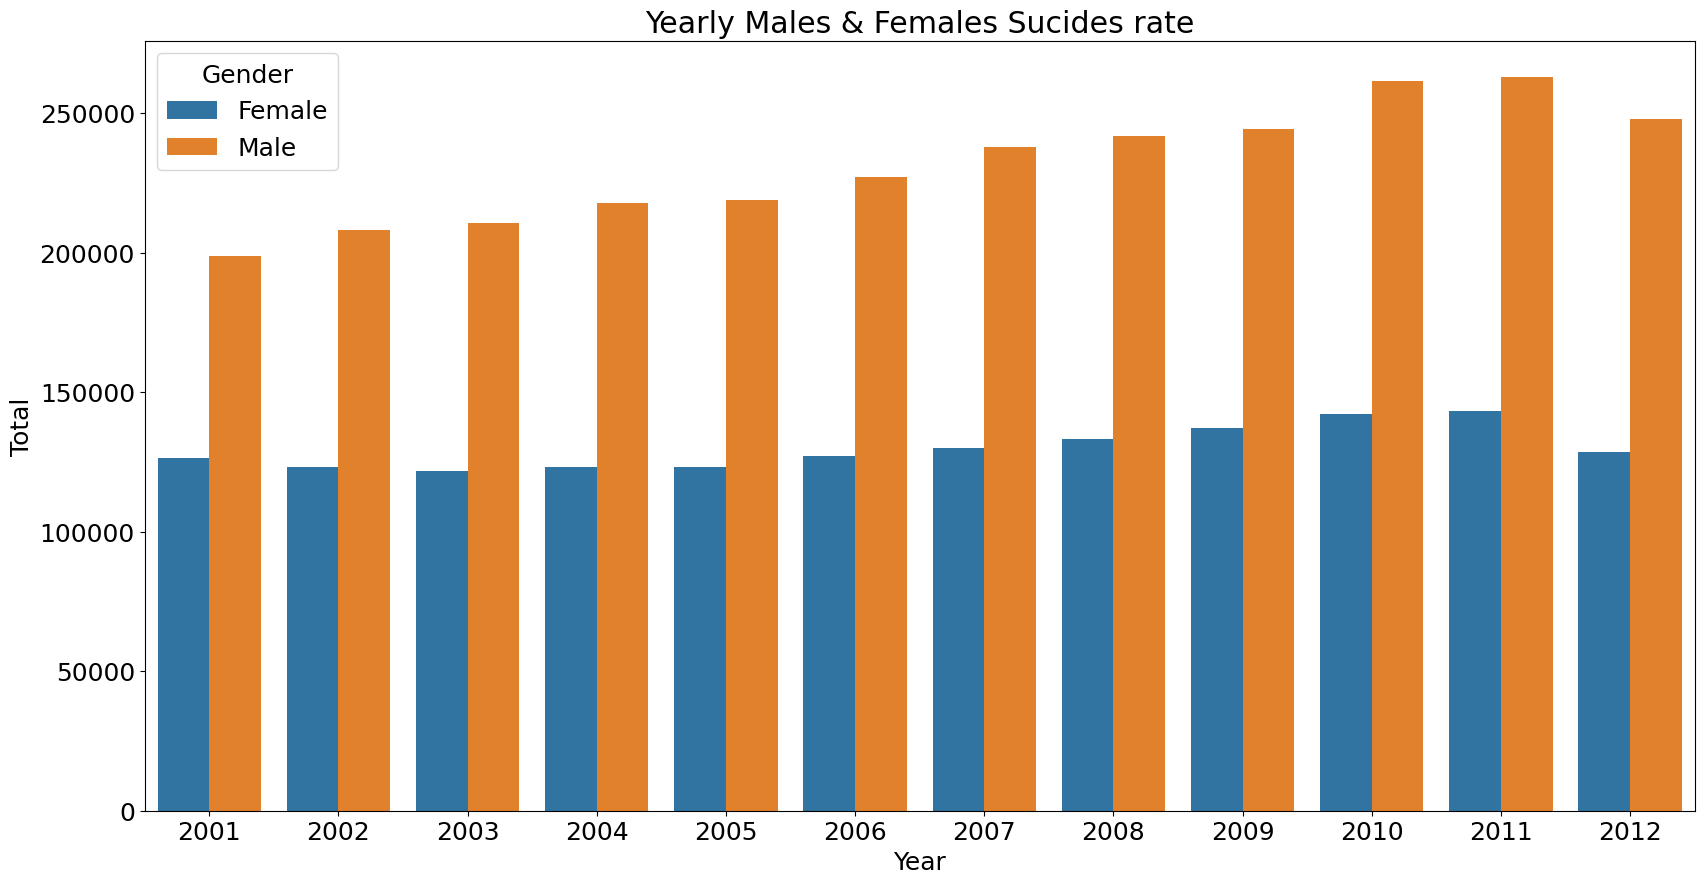

In [ ]:
gender_wise = df[['Year', 'Gender','Total']].groupby(['Year', 'Gender']).sum()
gender_wise.reset_index(inplace = True)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
plt.title('Yearly Males & Females Sucides rate')
ax = sns.barplot(x = 'Year', y = 'Total', hue = 'Gender', data = gender_wise)
plt.show()

### Men appear to be more vulnerable for suicide -- Reasons to be analyzed

Considering the data where cause of death is specified as separate set for analysis.


In [ ]:
reasons_set = df[df['Type_code'] == 'Causes']
reasons_set['Type'].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

1. Some reasons seem to be repetitive need to unify the reasons to one cause

In [ ]:
# Category correction
pd.options.mode.chained_assignment = None
reasons_set.loc[reasons_set['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy'
reasons_set.loc[reasons_set['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy'
reasons_set.loc[reasons_set['Type']=='Causes Not known', 'Type'] = 'Unknown'
reasons_set.loc[reasons_set['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'
reasons_set.loc[reasons_set['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Infertility'
reasons_set.loc[reasons_set['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Infertility'

In [ ]:
reasons_set['Type'].value_counts()

Unknown                                    6397
Family Problems                            3013
Other Prolonged Illness                    2680
Insanity/Mental Illness                    2572
Love Affairs                               1697
Poverty                                    1568
Death of Dear Person                       1511
Bankruptcy                                 1499
Fall in Social Reputation                  1496
Suspected/Illicit Relation                 1420
Drug Abuse/Addiction                       1406
Unemployment                               1404
Property Dispute                           1393
Failure in Examination                     1379
Cancer                                     1233
Professional/Career Problem                1160
Infertility                                1131
Cancellation/Non-Settlement of Marriage    1116
Paralysis                                  1105
Illness (Aids/STD)                         1011
Dowry Dispute                           

**Reasons and Suicides**

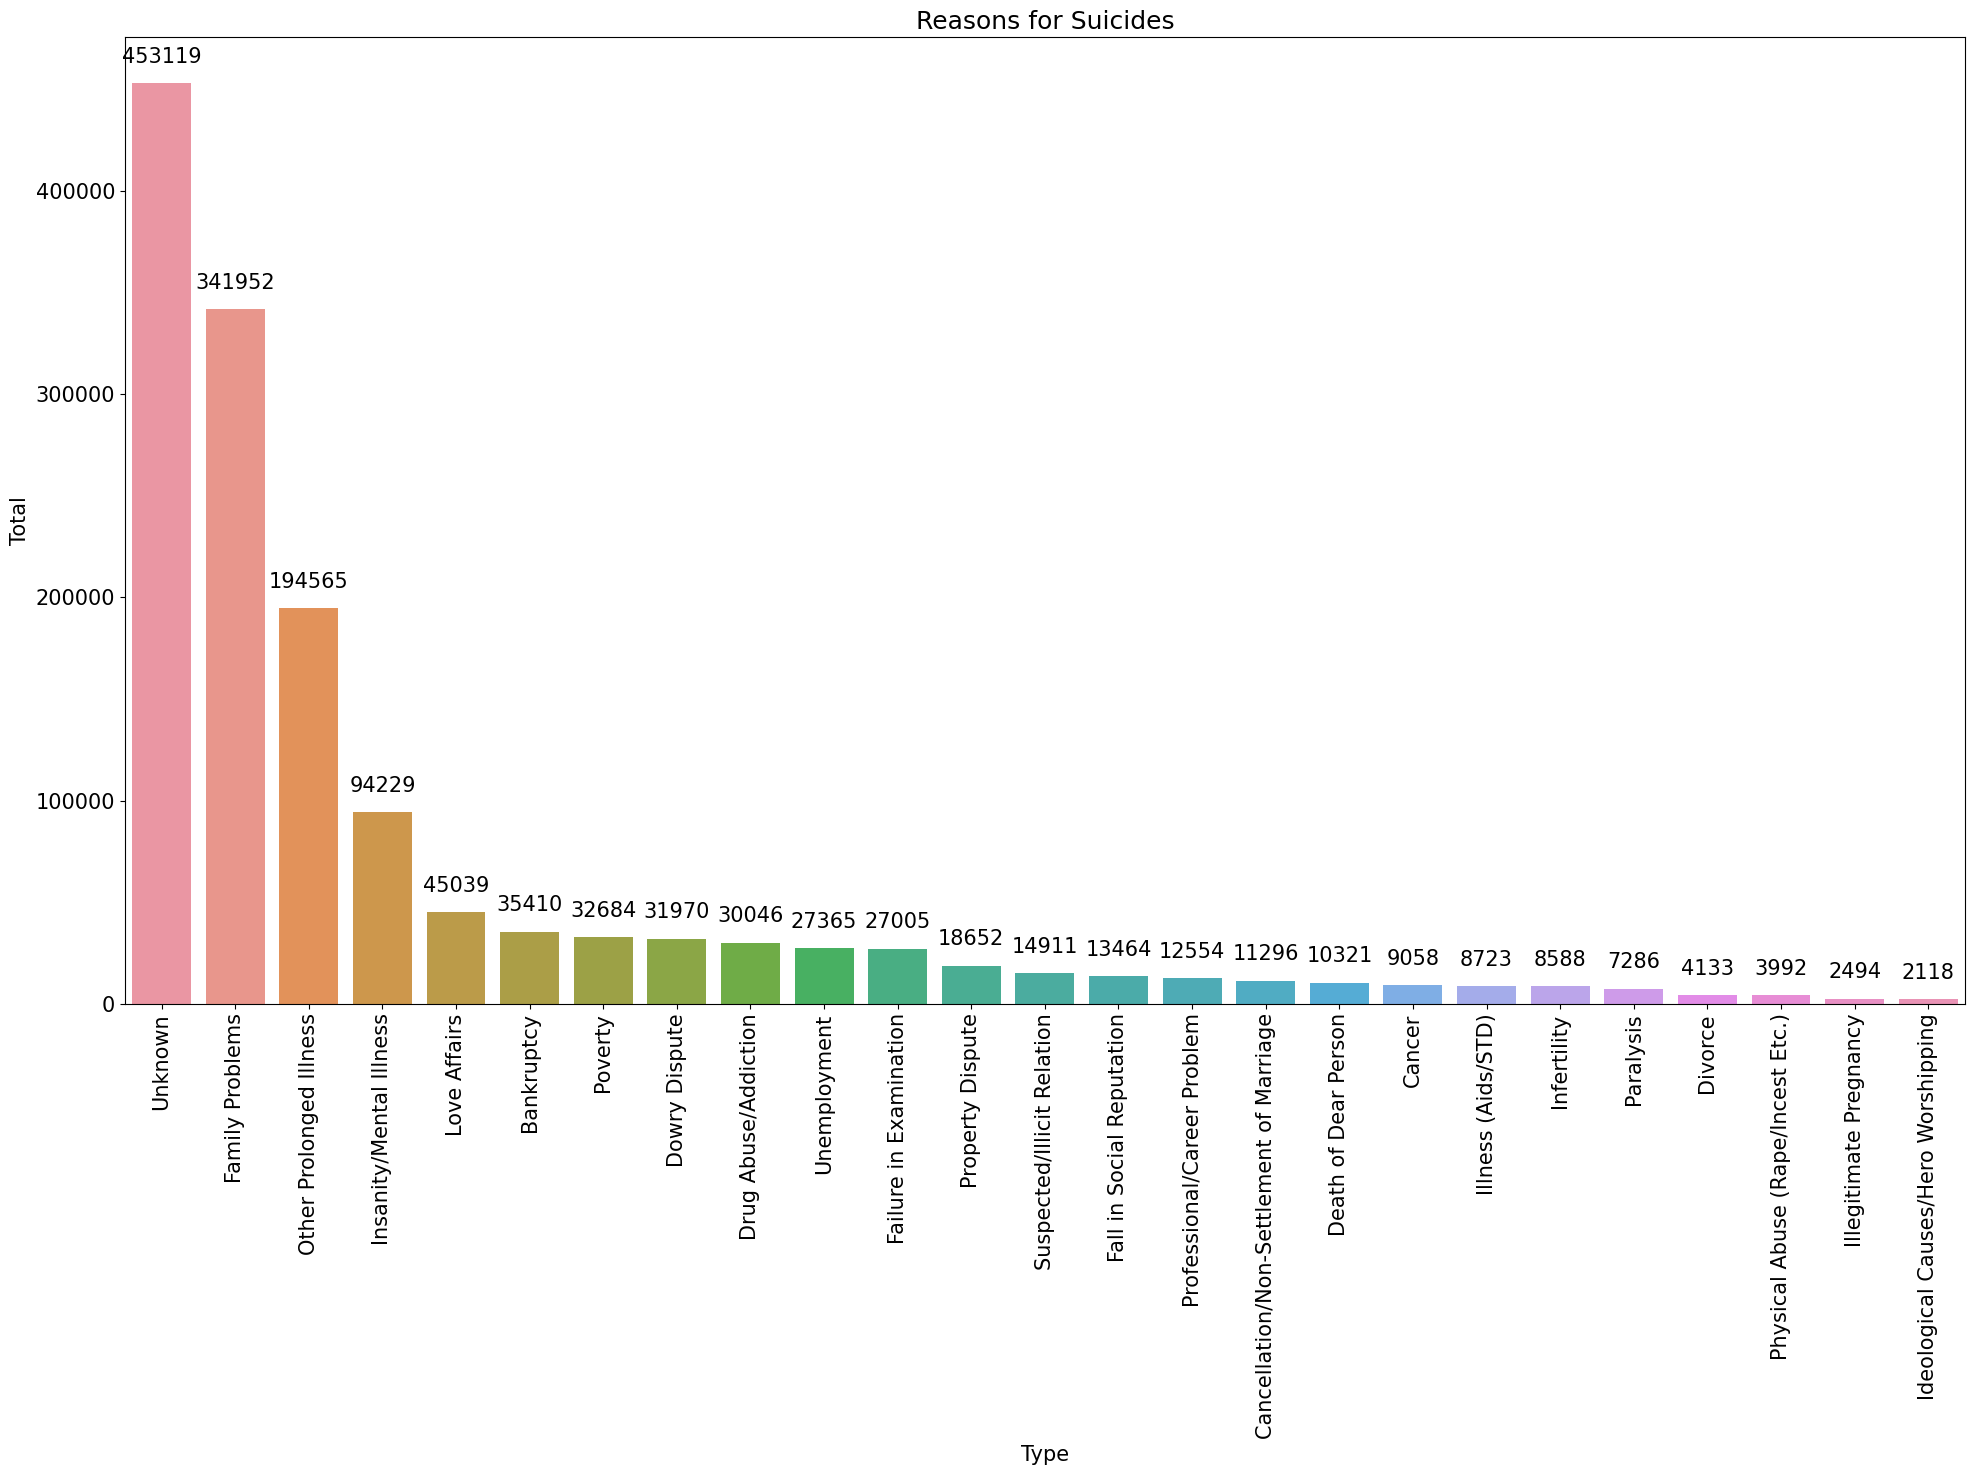

In [ ]:
set1 = reasons_set[['Type','Total']]
set1 = set1.groupby('Type').sum()
set1.reset_index(inplace = True)
set1 = set1.sort_values('Total', ascending = False)
set1 = set1.reset_index(drop=True)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize= (20,15))
trace = sns.barplot(x = set1['Type'], y = set1['Total'], data = set1)
for index, row in set1.iterrows():
    trace.text(x = row.name, y = row.Total+ 10000, s = str(row.Total),color='black', ha="center")
plt.title('Reasons for Suicides')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Observations :  Family Problems, Illness, Love afairs are in the top reasons list.  -- Are we proud of our family system

**Suicide Reasons and Gender**

<ipython-input-16-785796ec6cc7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_set = male_set.groupby('Type').sum().reset_index()


<Figure size 2000x1000 with 0 Axes>

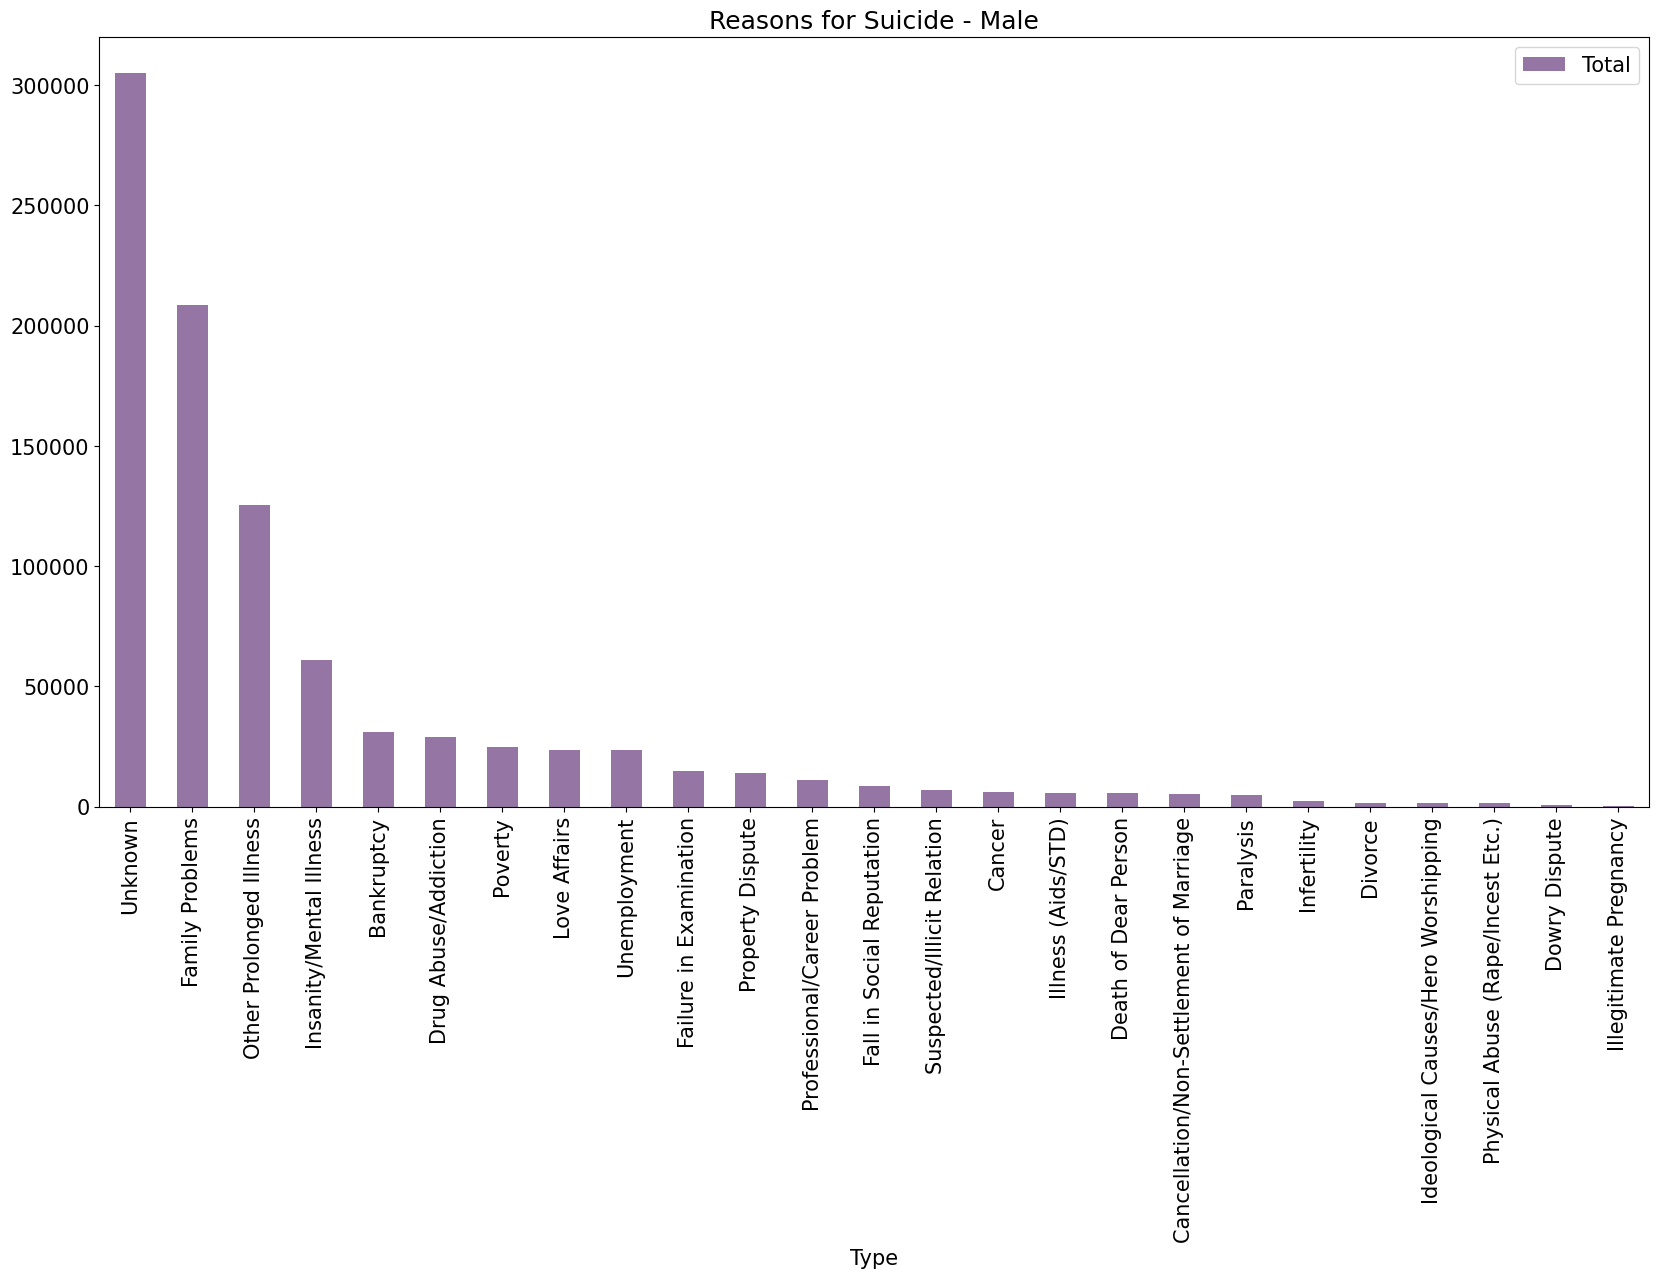

In [ ]:
#Male Suicides
gender_set = reasons_set[['Type', 'Gender', 'Total']]
male_set = gender_set[gender_set['Gender'] == 'Male']
male_set = male_set.groupby('Type').sum().reset_index()
male_set = male_set.sort_values('Total', ascending = False)
male_set = male_set.reset_index(drop=True)
plt.figure(figsize = (20,10))
male_set.plot(kind = 'bar', x = 'Type', figsize = (20,10), color = (0.3,0.1,0.4,0.6))
plt.xticks(rotation = 90)
plt.title("Reasons for Suicide - Male")
plt.show()

<ipython-input-17-36c879e68515>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  female_set = female_set.groupby('Type').sum().reset_index()


<Figure size 2000x1000 with 0 Axes>

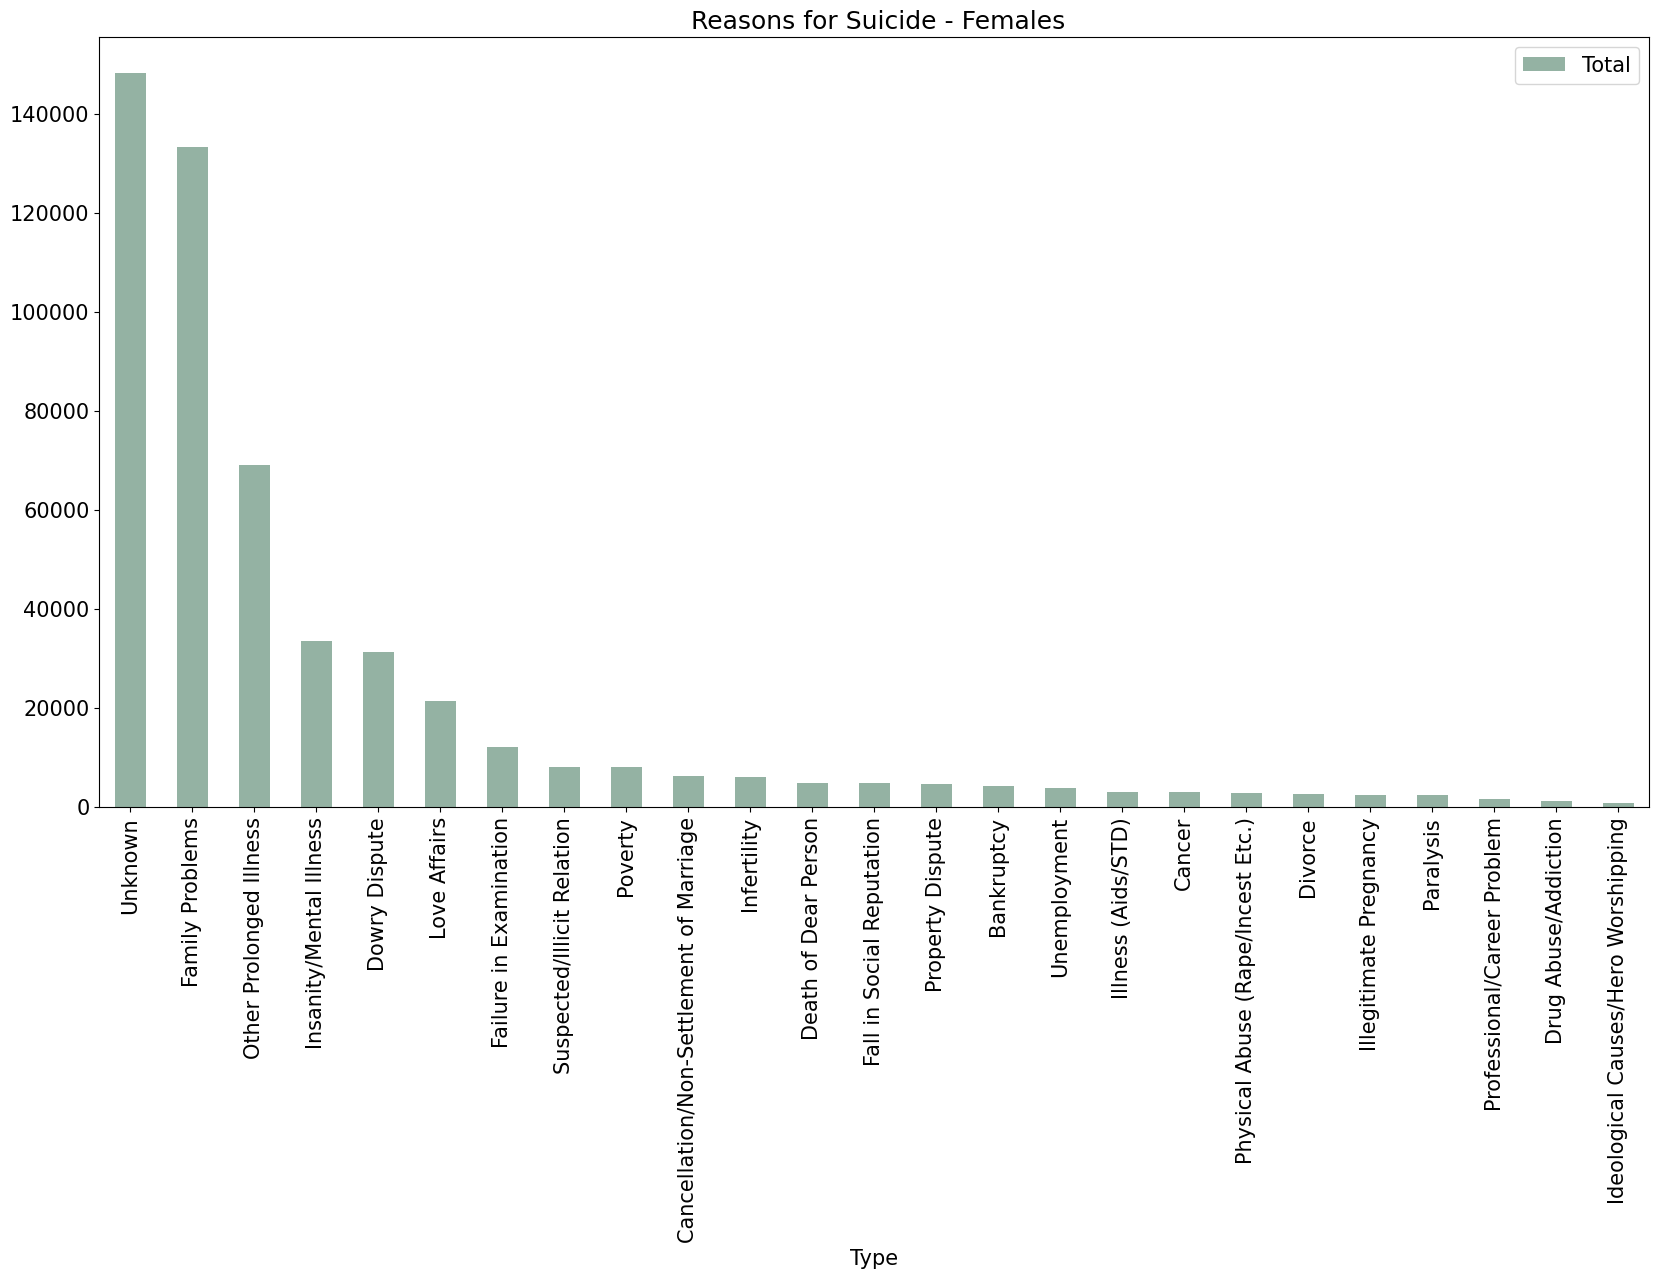

In [ ]:
# females suicides
female_set = gender_set[gender_set['Gender'] == 'Female']
female_set = female_set.groupby('Type').sum().reset_index()
female_set = female_set.sort_values('Total', ascending = False)
female_set = female_set.reset_index(drop=True)
plt.figure(figsize = (20,10))
female_set.plot(kind = 'bar', x = 'Type', figsize = (20,10), color = (0.3,0.5,0.4,0.6))
plt.xticks(rotation = 90)
plt.title(" Reasons for Suicide - Females")
plt.show()

In [ ]:
total_set = pd.concat([female_set, male_set], axis = 1)
total_set.columns = ['Type', 'Female', 't', 'Male']
total_set = total_set.drop(columns = ['t'])
female_more = total_set[total_set['Female'] > total_set['Male']]
female_more

,Type,Female,Male
4,Dowry Dispute,31206,31175
19,Divorce,2535,2521
20,Illegitimate Pregnancy,2391,1598
21,Paralysis,2284,1342
22,Professional/Career Problem,1596,1330
23,Drug Abuse/Addiction,1205,764
24,Ideological Causes/Hero Worshipping,776,103


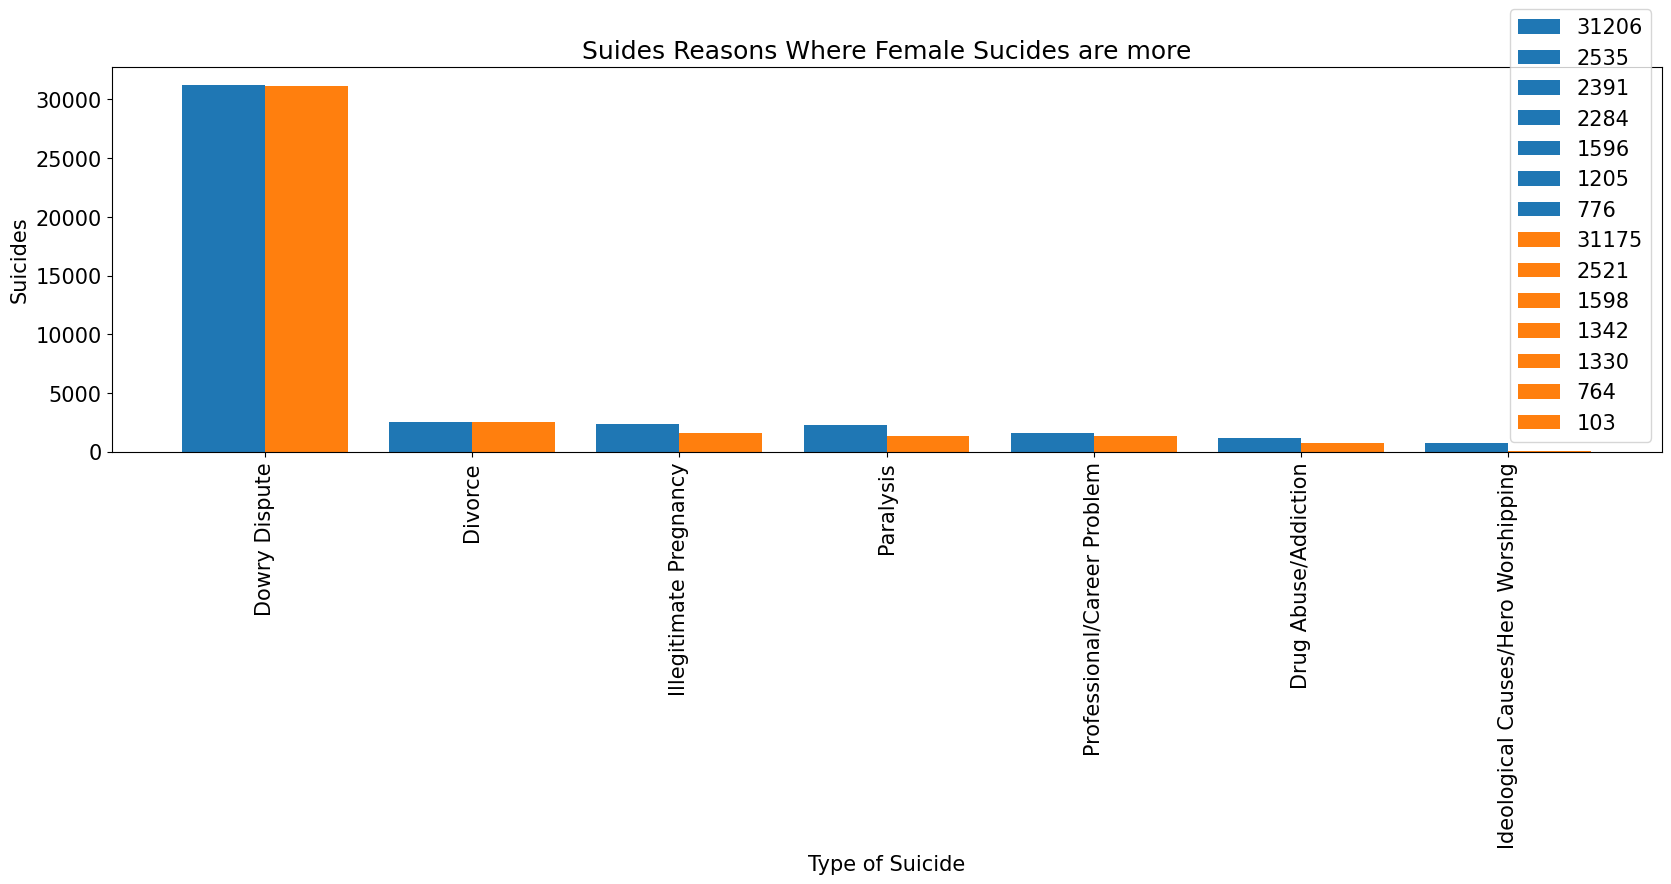

In [ ]:
fig = plt.figure(figsize=(20,5))
N= len(female_more)
ind = np.arange(N); width = 0.4
category = list(female_more['Type'])
plt.bar(x = ind, height = 'Female', data = female_more, width = width, label = 'Female')
plt.bar(x = ind+width, height = 'Male', data = female_more, width = width, label = 'Male')
plt.xlabel("Type of Suicide")
plt.ylabel("Suicides")
plt.title("Suides Reasons Where Female Sucides are more")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

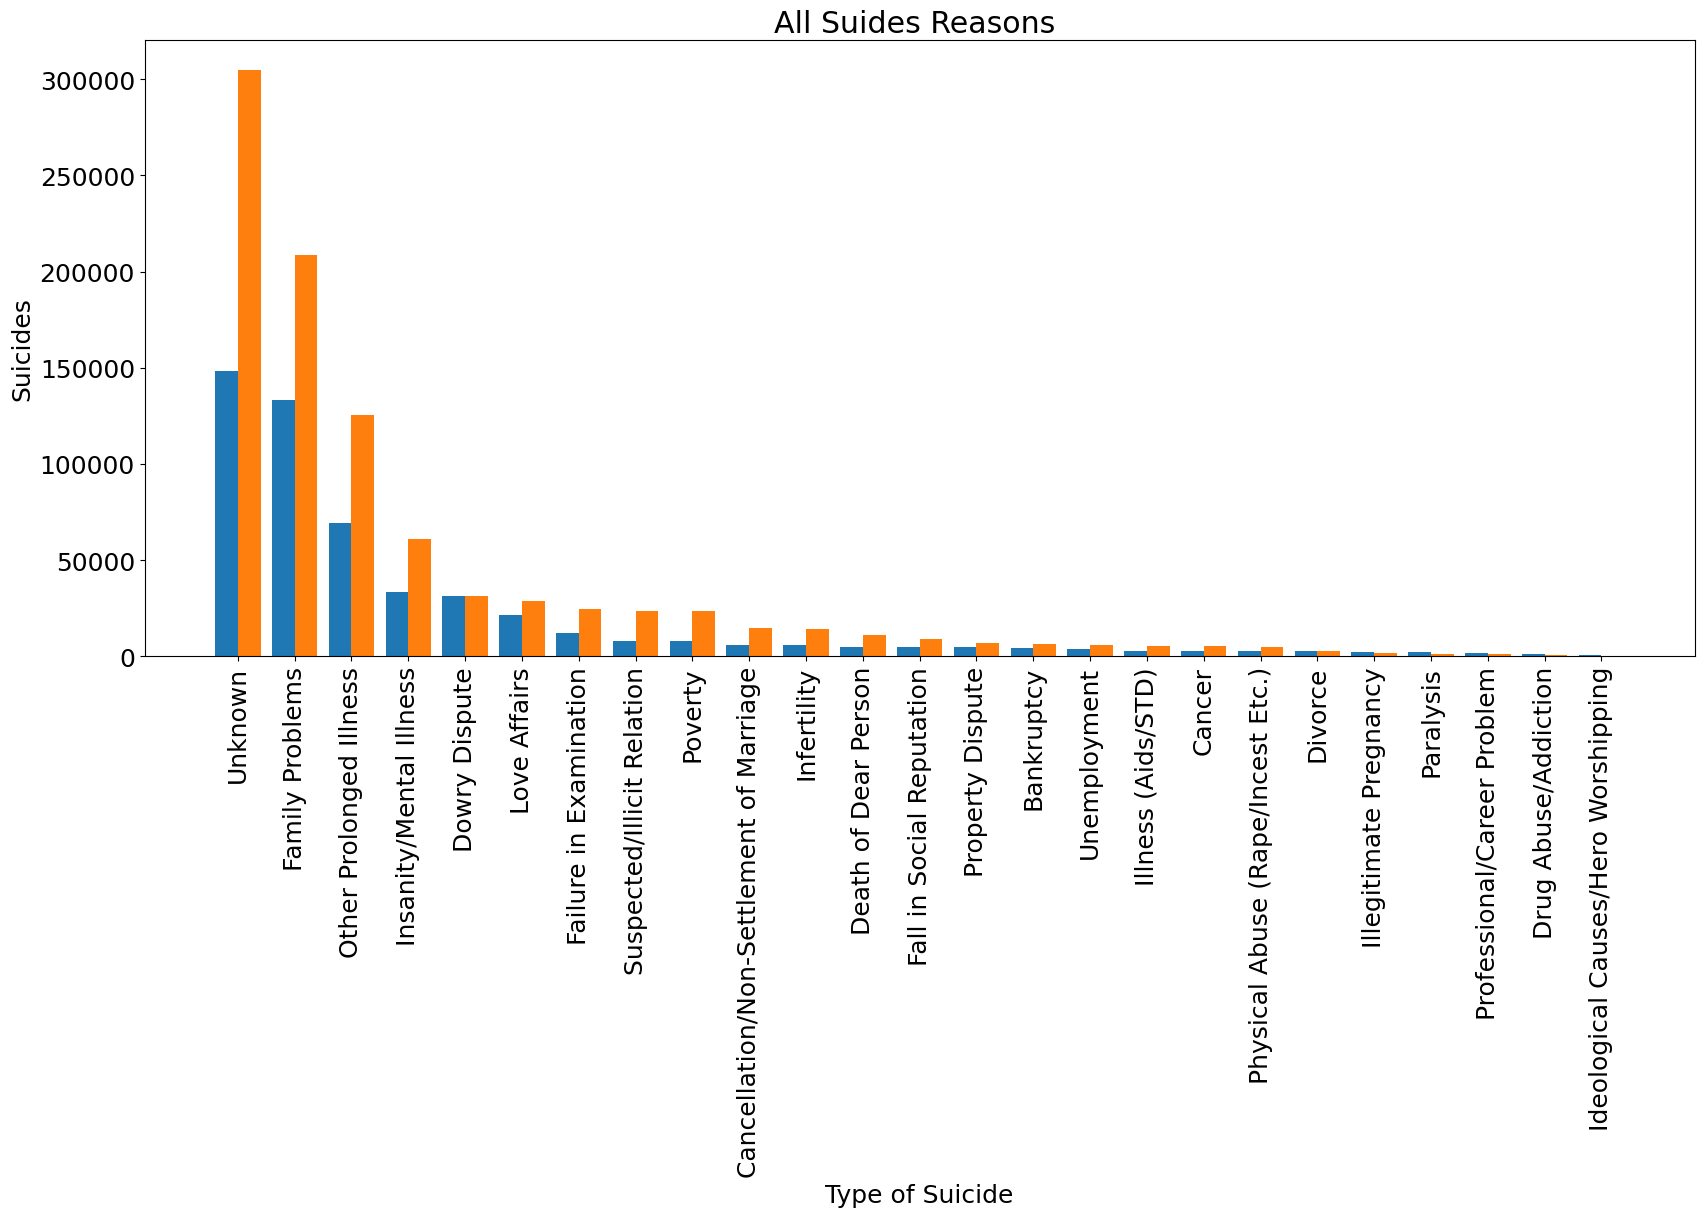

In [ ]:
fig = plt.figure(figsize=(20,8))
N= len(total_set)
ind = np.arange(N); width = 0.4
category = list(total_set['Type'])
plt.bar(x = ind, height = 'Female', data = total_set, width = width, label = 'Female')
plt.bar(x = ind+width, height = 'Male', data = total_set, width = width, label = 'Male')
plt.xlabel("Type of Suicide")
plt.ylabel("Suicides")
plt.title("All Suides Reasons ")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.show()

**Age Group and Reasons for Suicide**

<ipython-input-20-0b2c0b337b1b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)


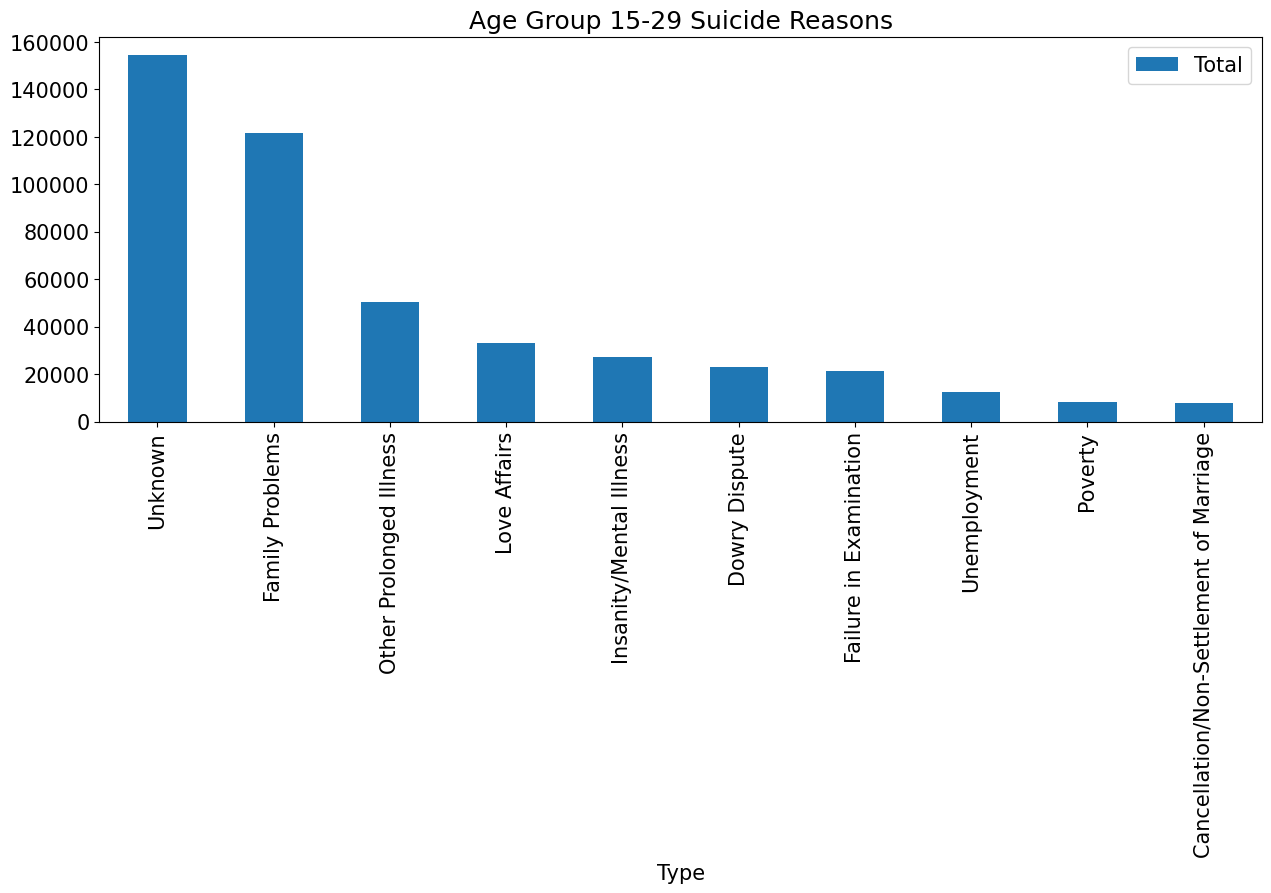

<ipython-input-20-0b2c0b337b1b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)


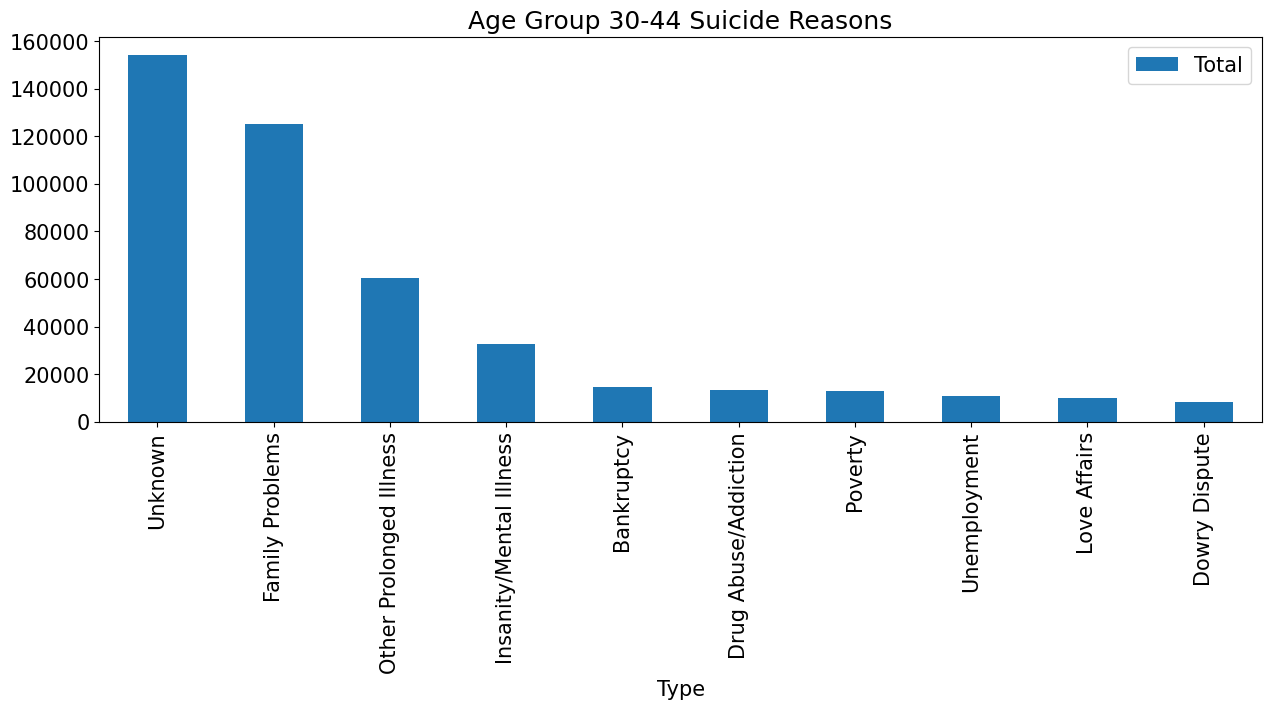

<ipython-input-20-0b2c0b337b1b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)


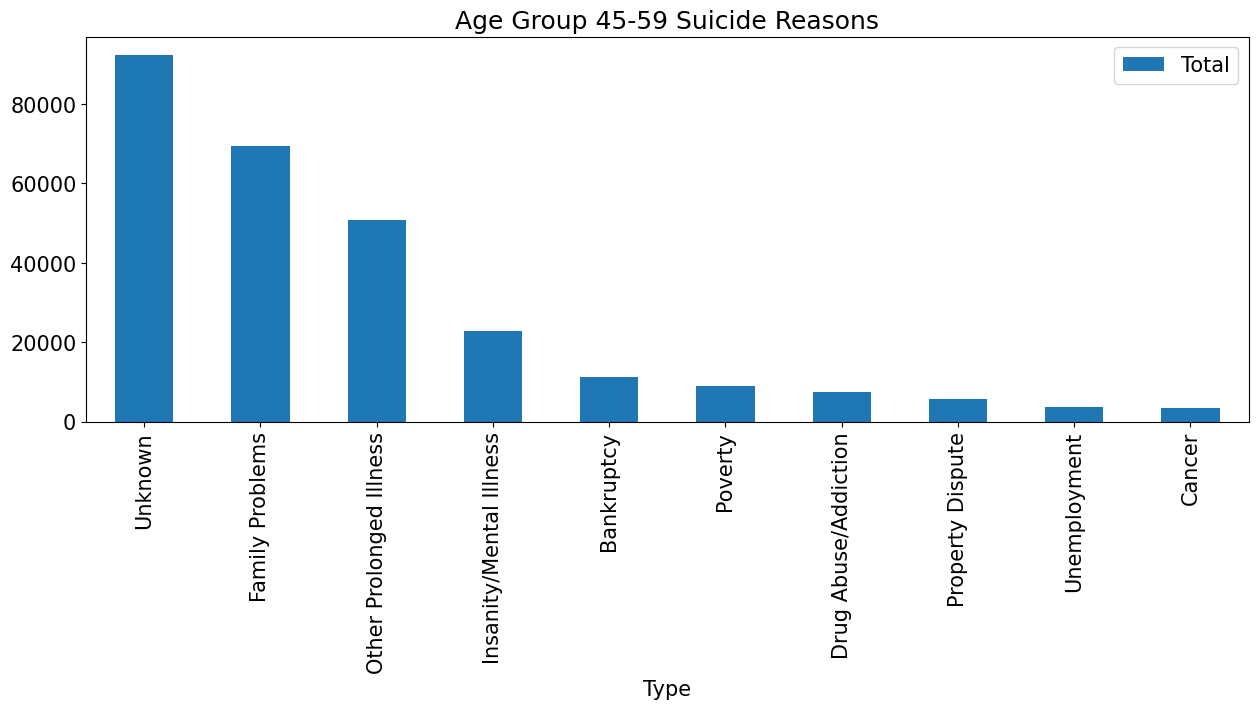

<ipython-input-20-0b2c0b337b1b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)


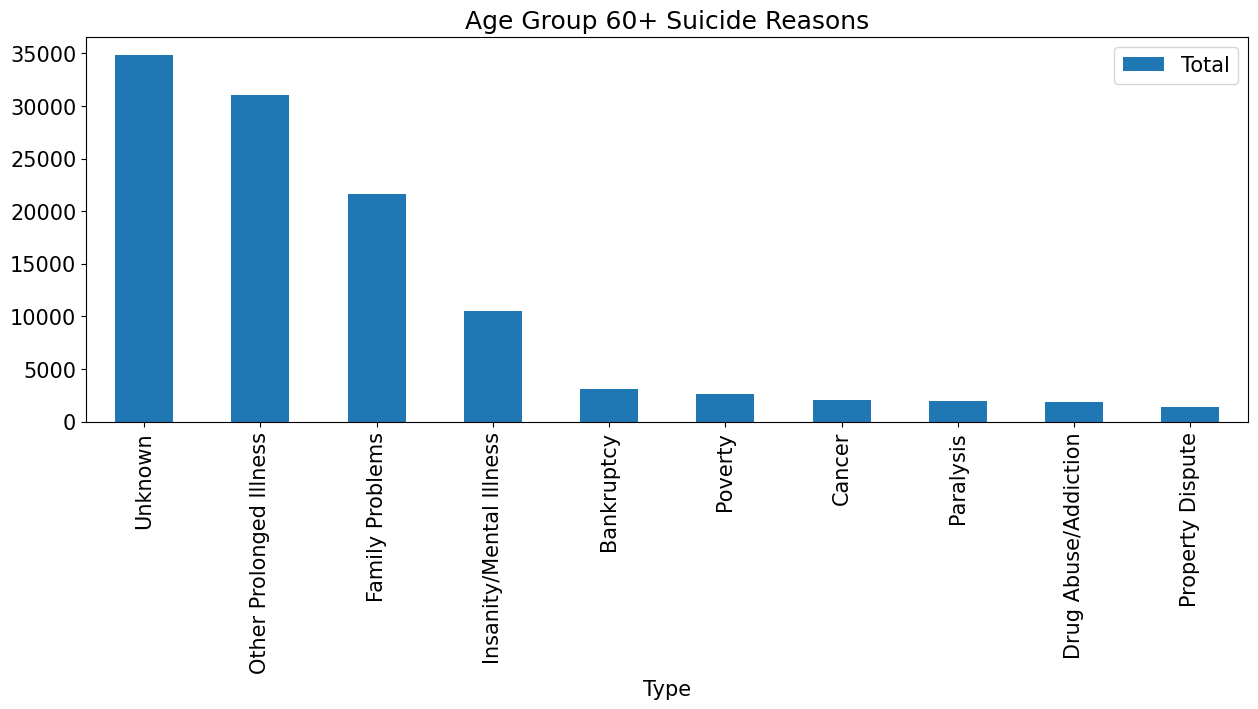

<ipython-input-20-0b2c0b337b1b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)


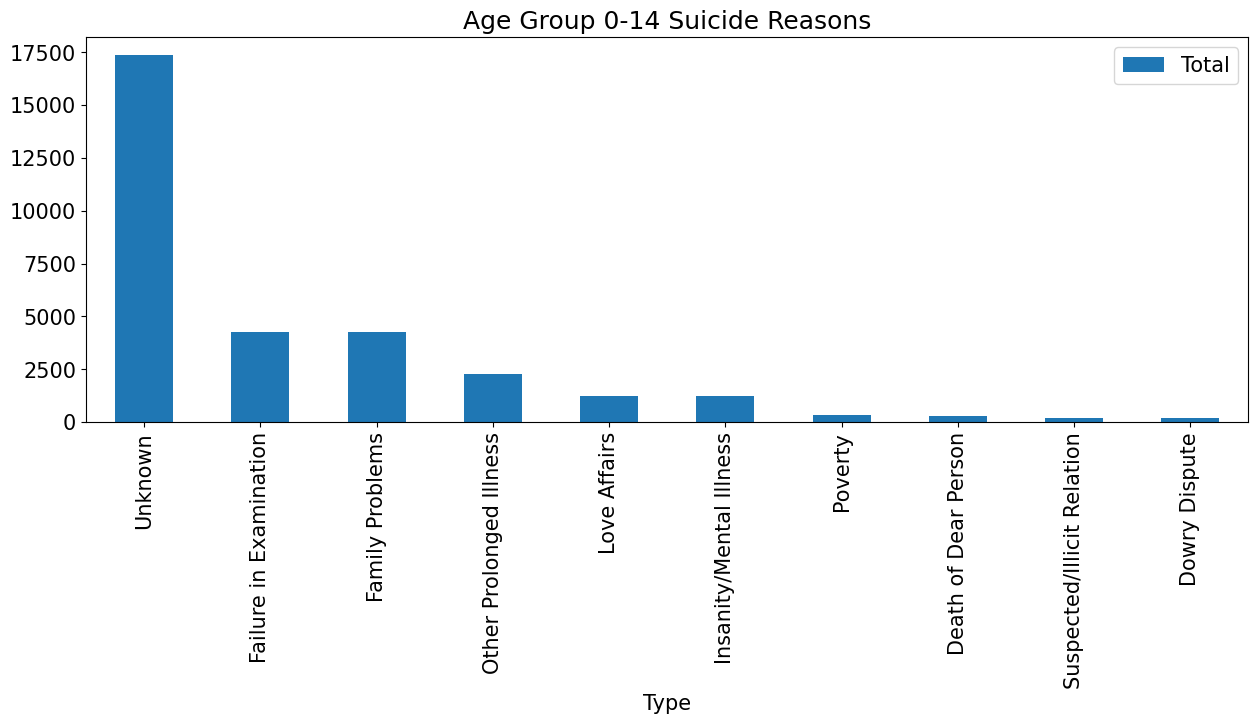

In [ ]:
age_set = reasons_set[['Type','Age_group','Total']]
age_grp = reasons_set['Age_group'].value_counts().index
age_grp = list(age_grp)
for x in age_grp:
    group_set = age_set[age_set['Age_group'] == x ]
    group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)
    group_set = group_set.head(10)
    group_set.plot(kind = 'bar', figsize = (15,5), title = 'Age Group '+x+ ' Suicide Reasons')
    plt.show()

Yearwise  Reasons count

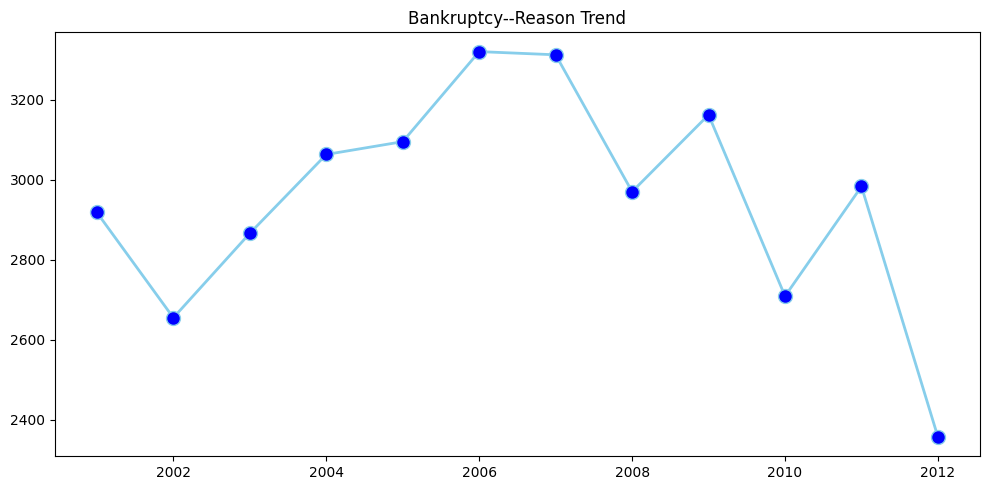

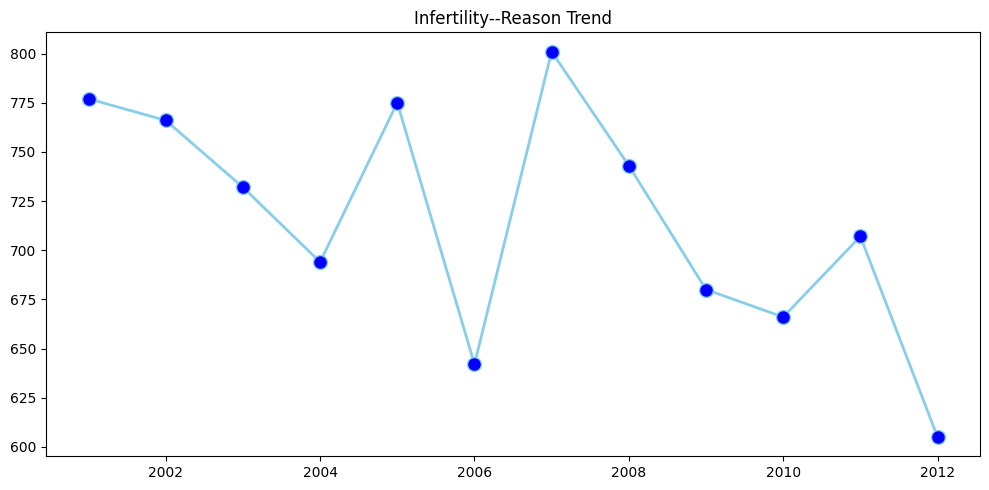

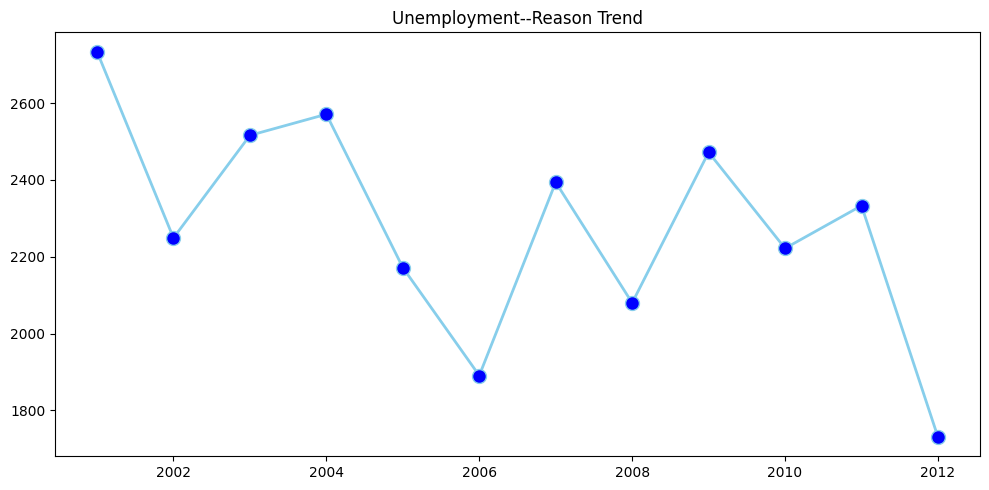

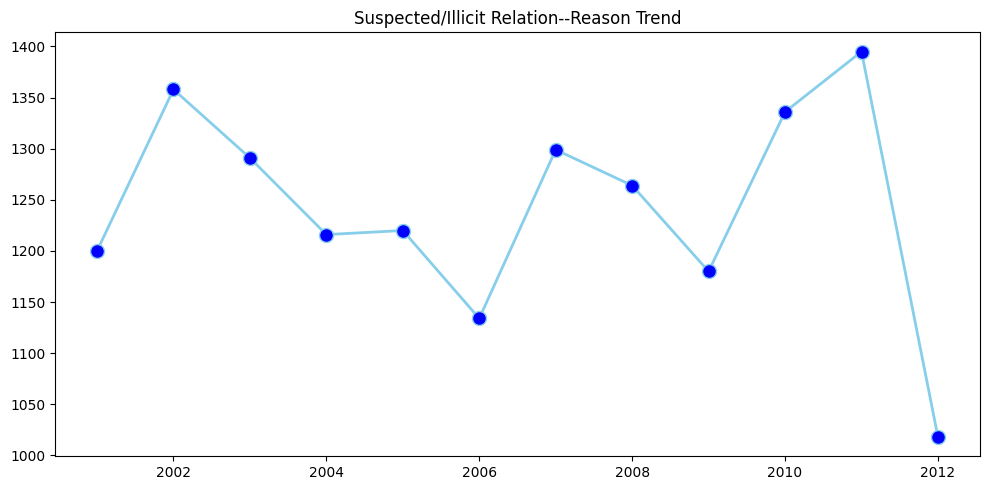

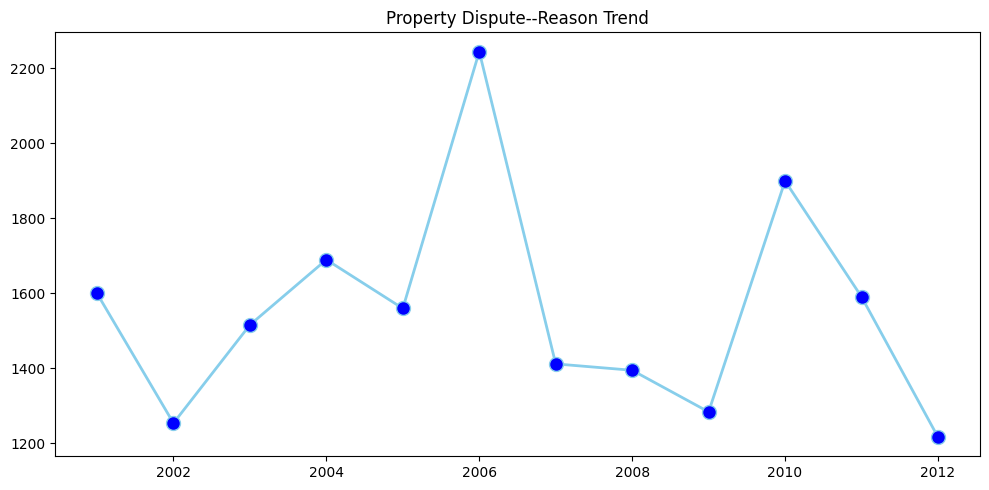

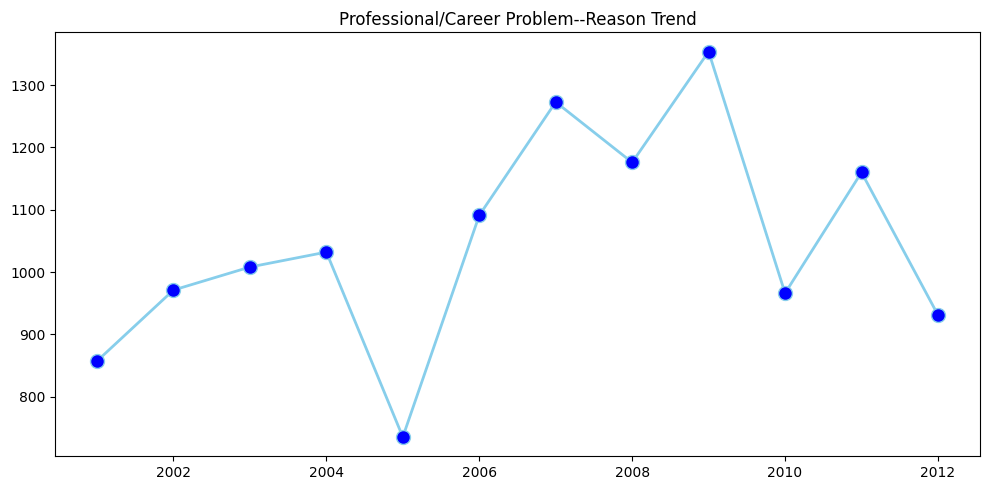

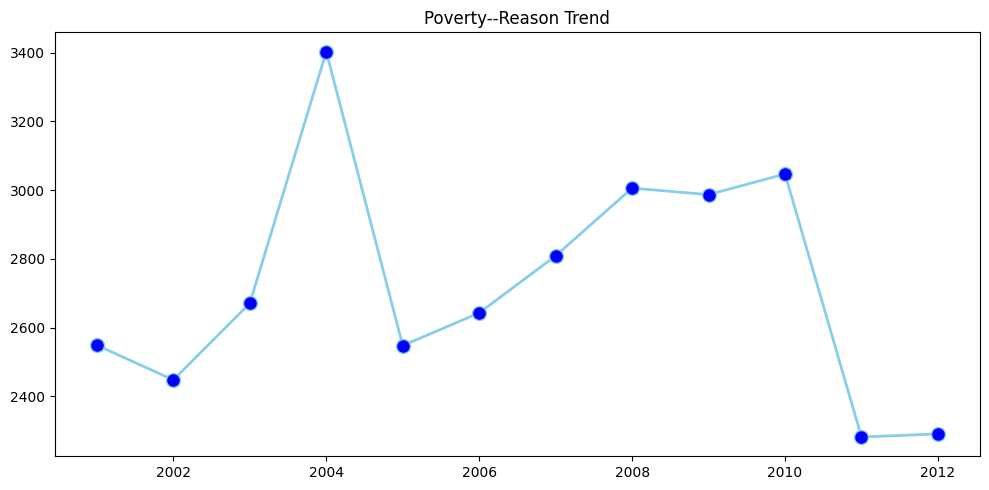

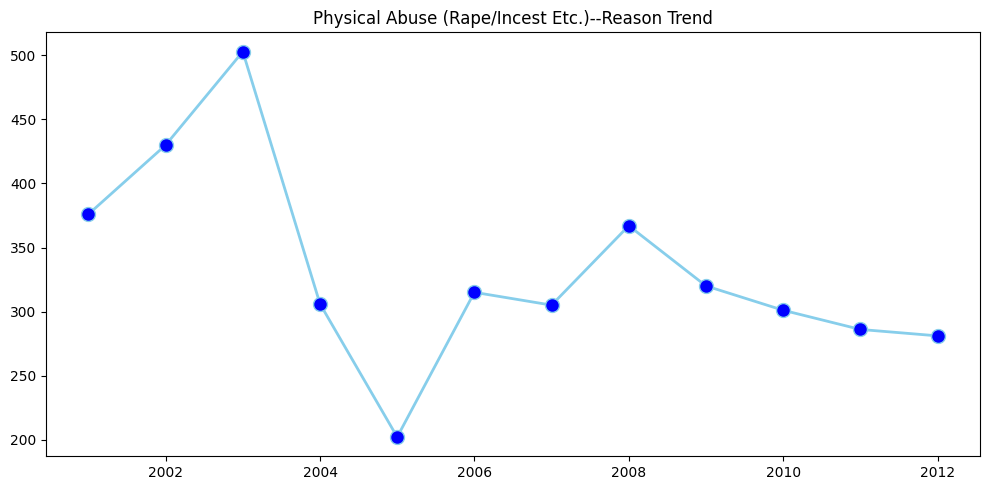

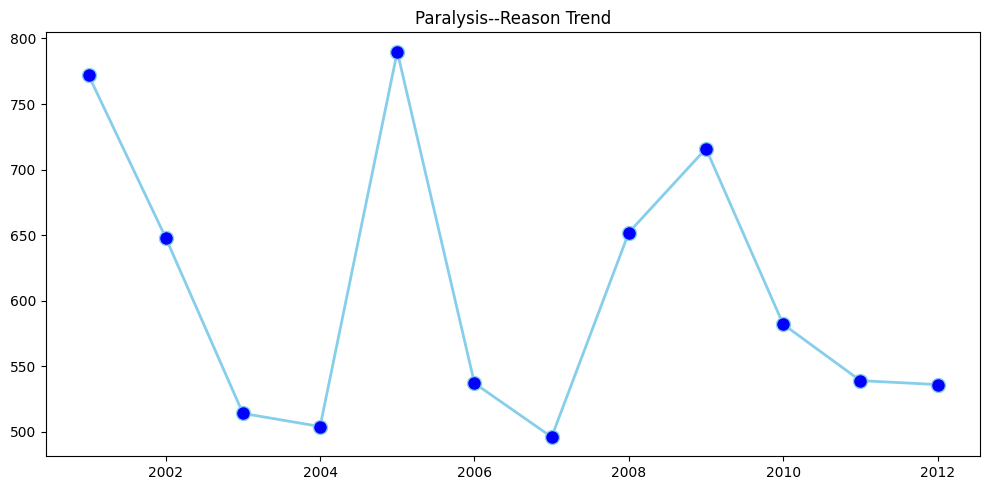

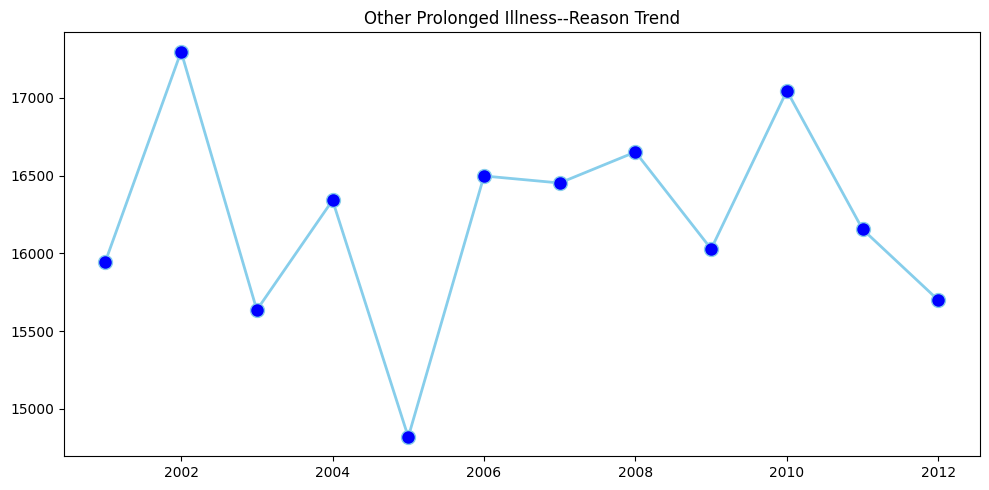

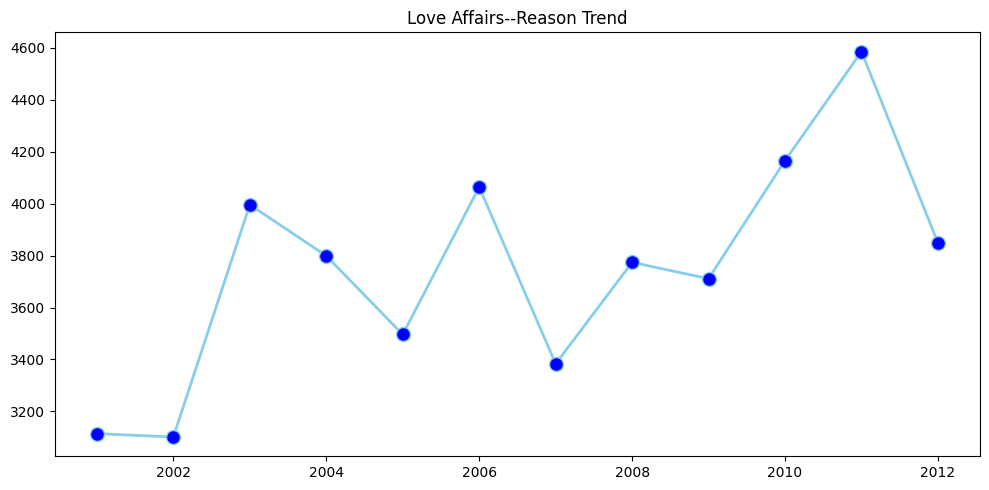

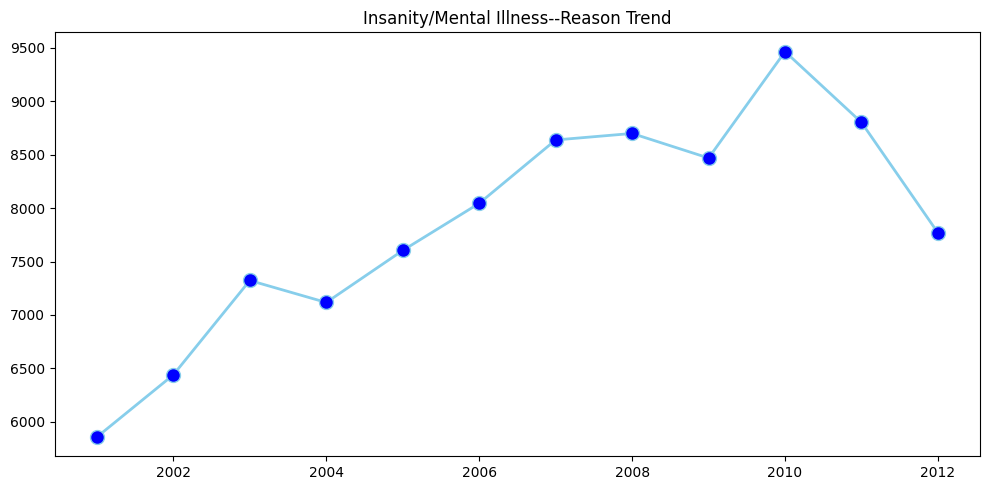

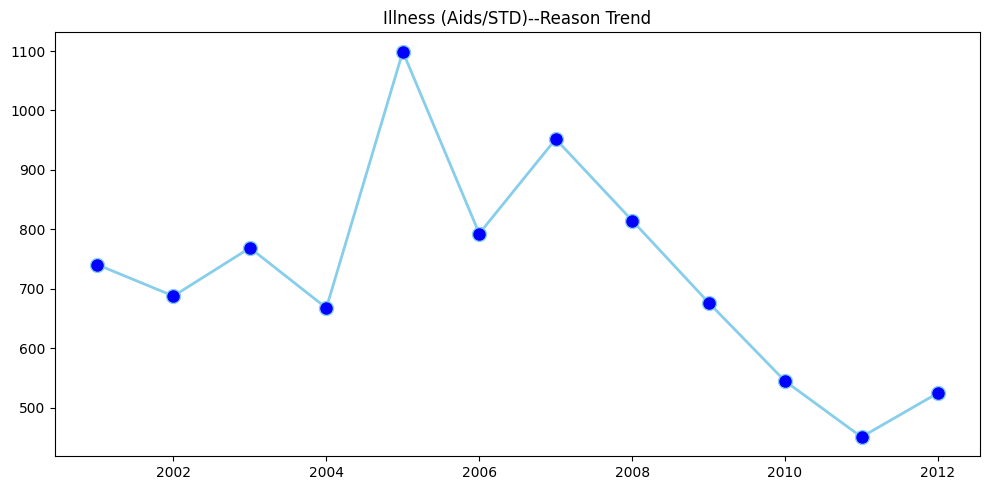

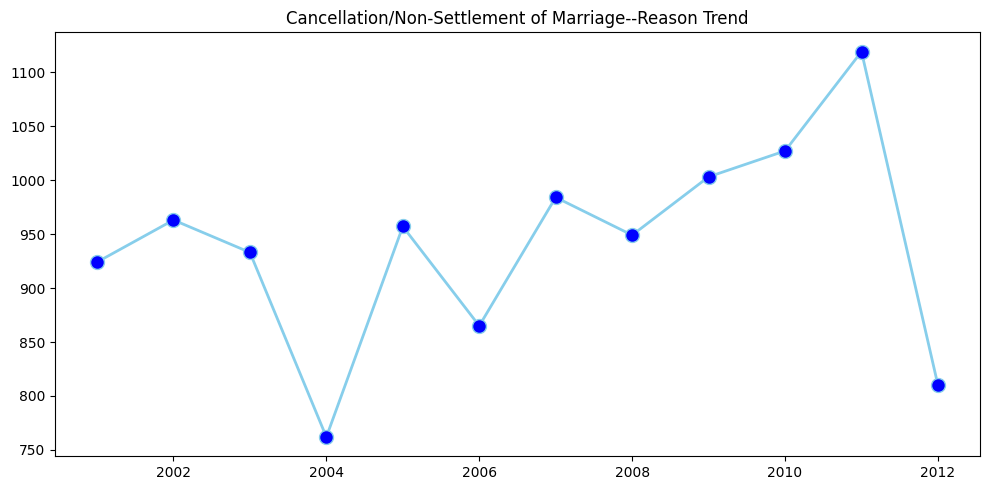

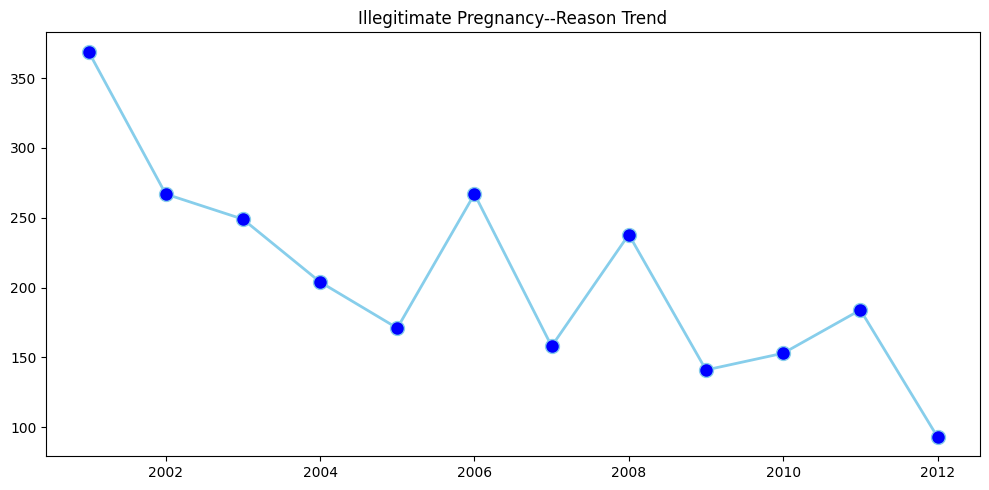

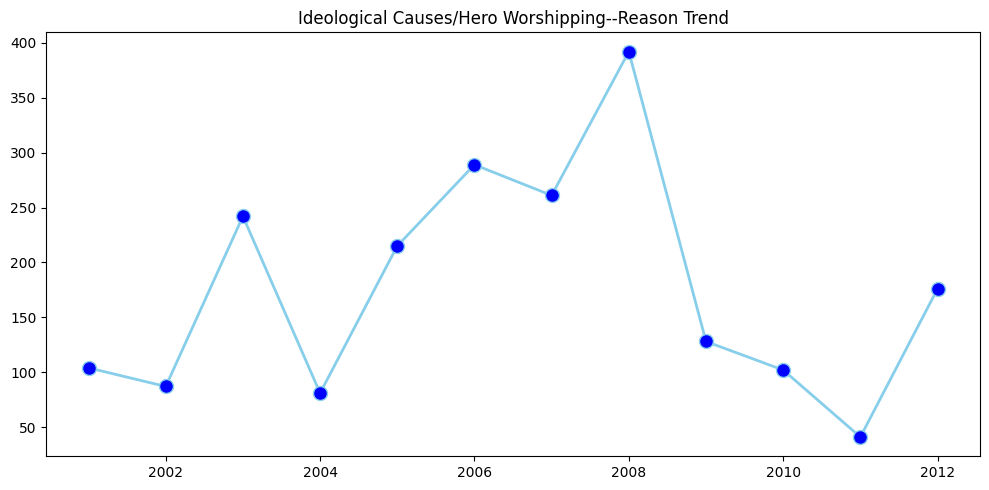

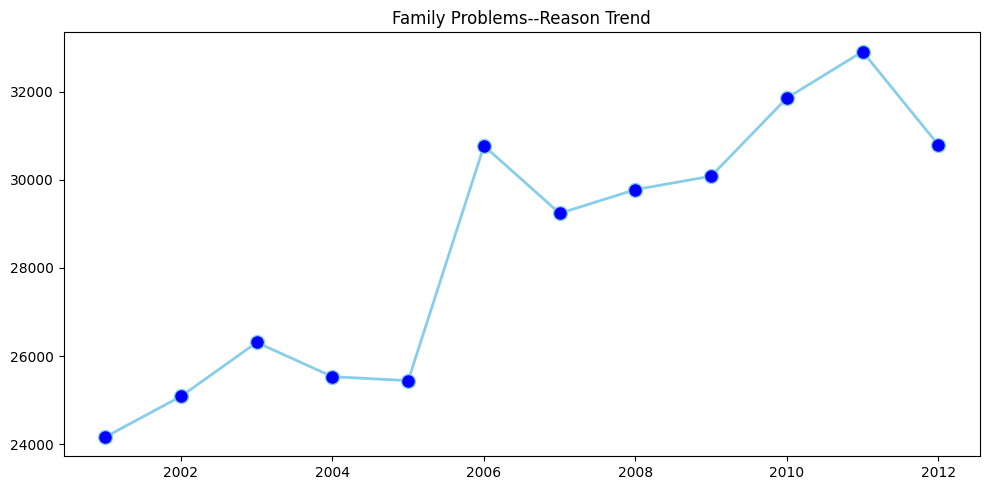

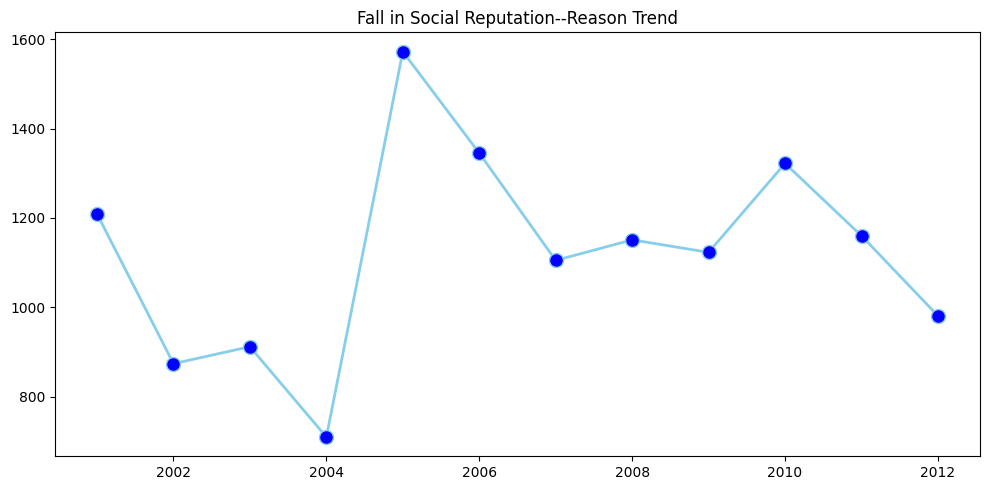

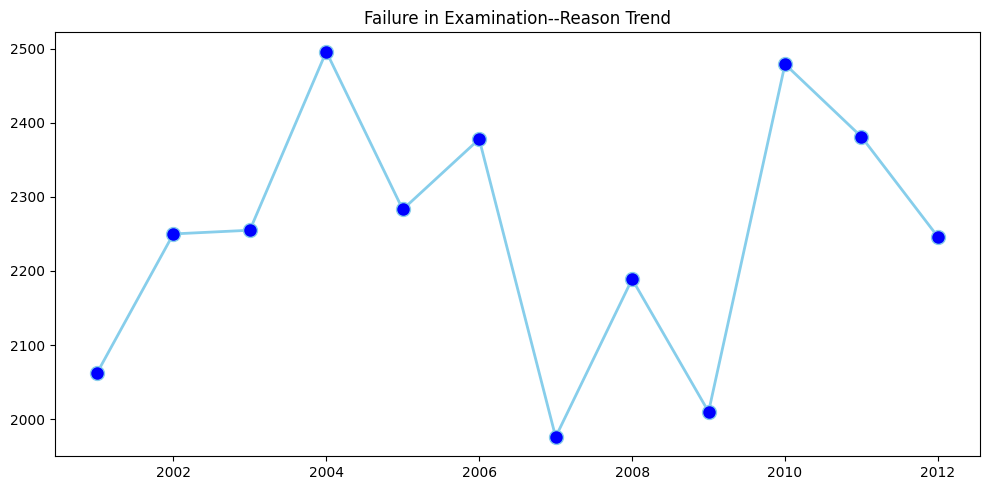

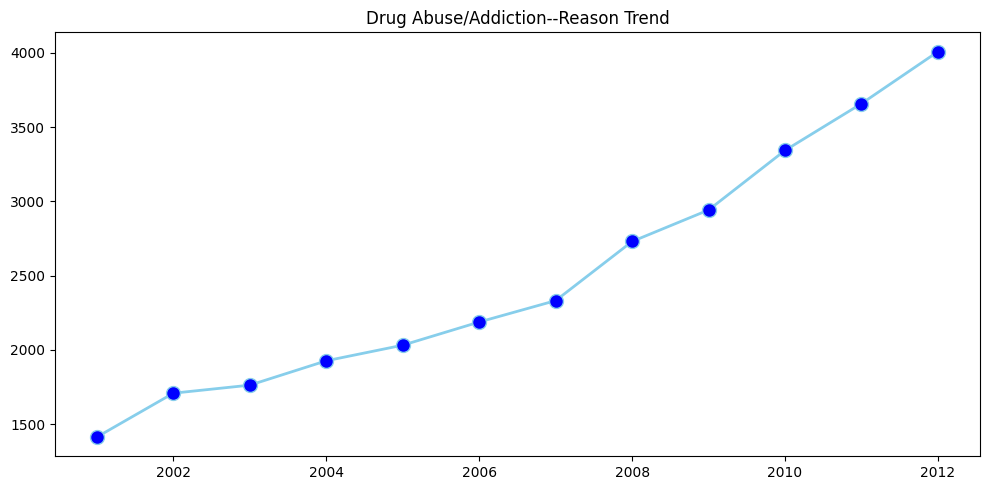

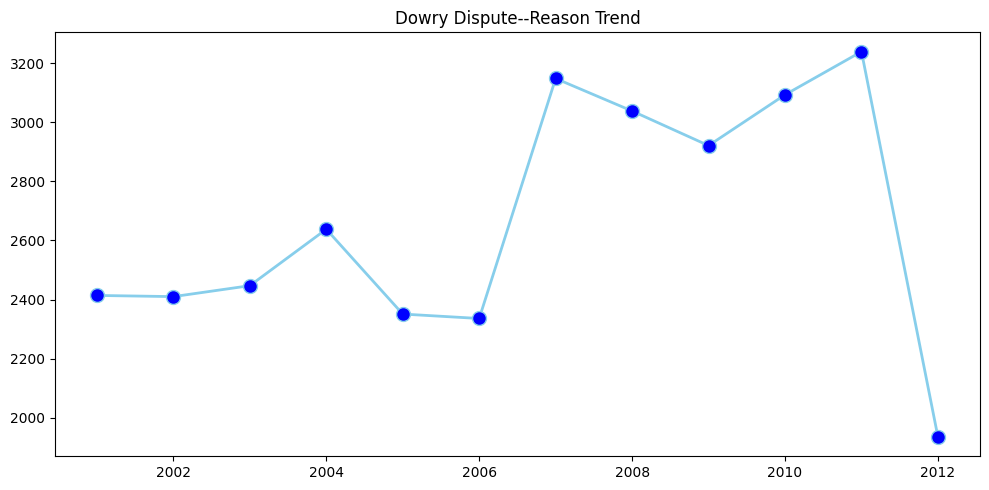

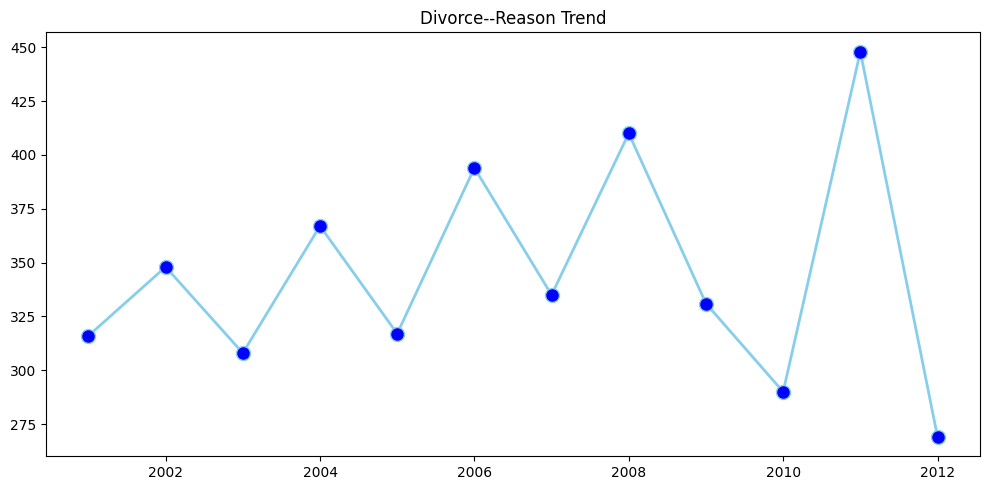

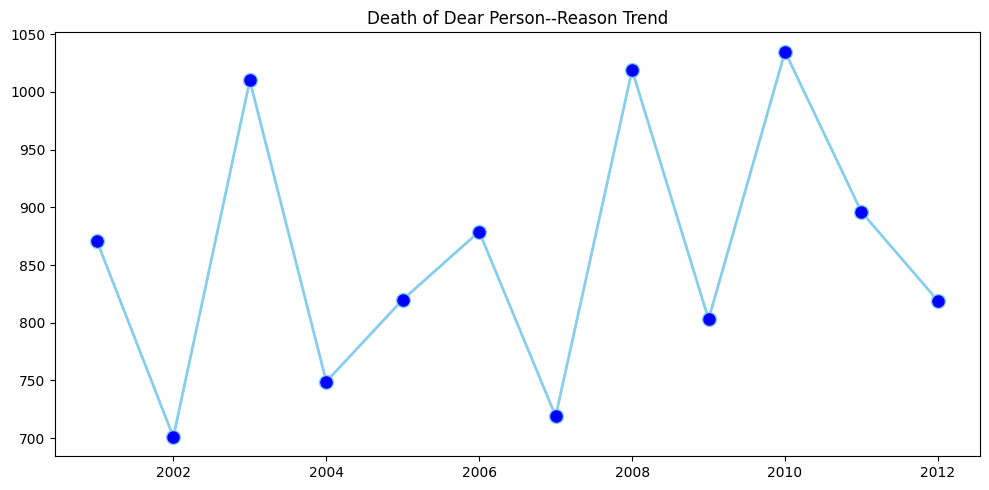

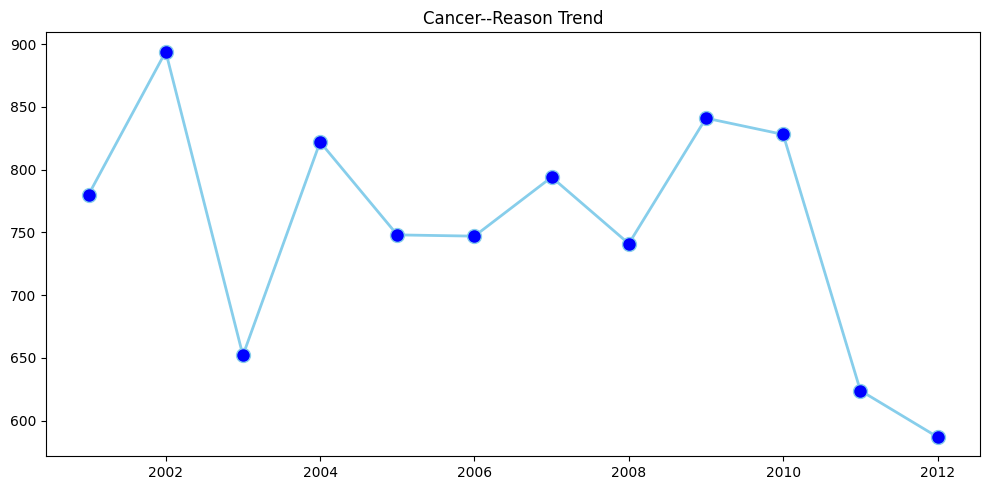

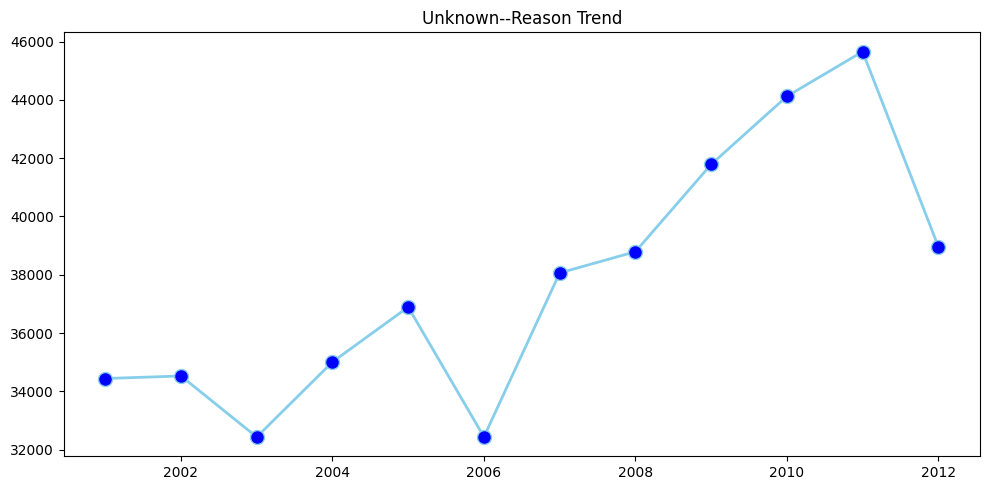

In [ ]:
year_reasons = reasons_set[['Year', 'Type', 'Total']]
year_reasons = year_reasons.groupby(['Type', 'Year']).sum().reset_index()
reasons = year_reasons['Type']
reasons = reasons.value_counts()
years = year_reasons['Year'].values
years  = list(years)
count = 1
reasons = list(reasons.index)
for var in reasons:
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize = (10,5))
    trace1 =  year_reasons[year_reasons['Type'] == var]
    plt.plot( 'Year', 'Total', data=trace1, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2)
    plt.title(var + '--Reason Trend')
    plt.tight_layout()
    plt.show()

**States and overall suicides count**

<Figure size 2000x1500 with 0 Axes>

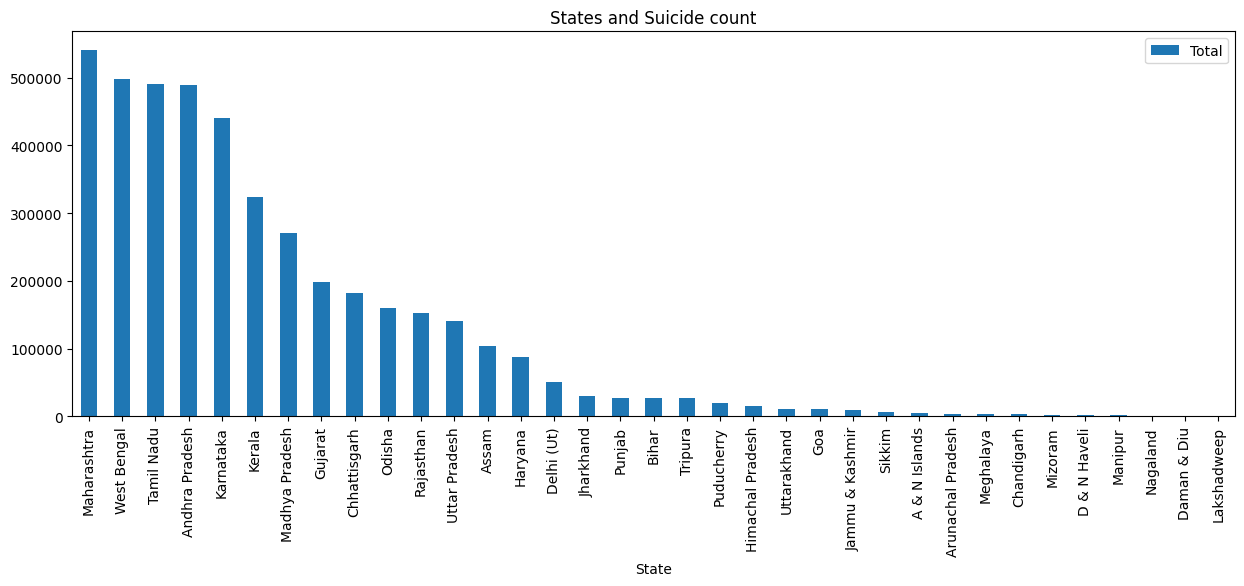

In [ ]:
state_count = df[['State','Total']]
state_count = state_count.groupby('State').sum()
state_count = state_count.sort_values('Total', ascending = False)
state_count = state_count.reset_index()
plt.figure(figsize = (20,15))
state_count.plot(kind = 'bar',x = 'State', figsize = (15,5), title = 'States and Suicide count')
plt.show()

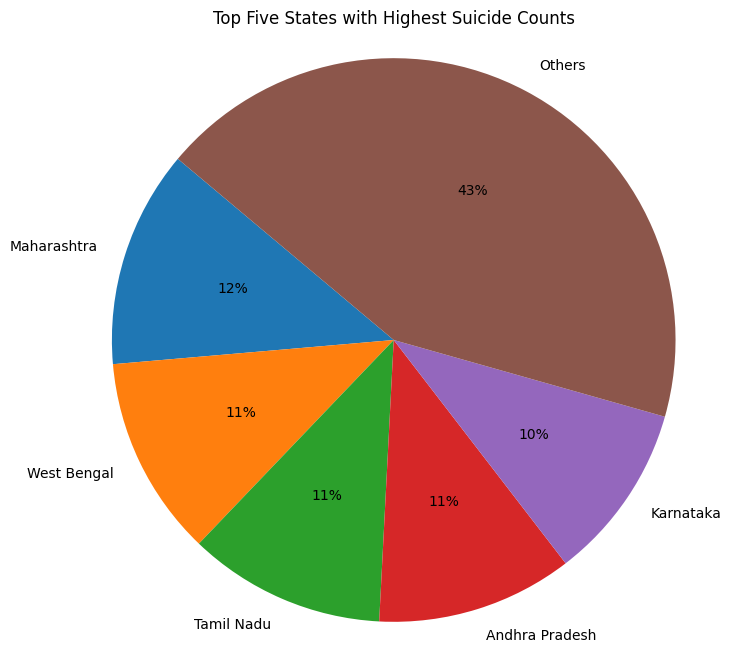

In [ ]:
top_five_states = state_count.head(5)
other_states = state_count.iloc[5:]
other_states_total = other_states['Total'].sum()
others_row = pd.DataFrame({'State': ['Others'], 'Total': [other_states_total]})
combined_states = pd.concat([top_five_states, others_row])
plt.figure(figsize=(8, 8))
plt.pie(combined_states['Total'], labels=combined_states['State'], autopct='%1.0f%%', startangle=140)
plt.title('Top Five States with Highest Suicide Counts')
plt.axis('equal')
plt.show()

In [ ]:
print('Top 5 States that recorded highest number of suicides')
print(state_count.head(5))

Top 5 States that recorded highest number of suicides
            State   Total
0     Maharashtra  541167
1     West Bengal  497962
2      Tamil Nadu  491065
3  Andhra Pradesh  488419
4       Karnataka  440895
